In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

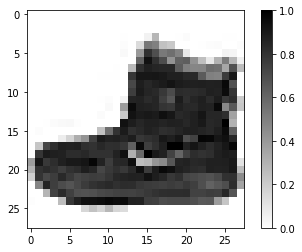

In [30]:
plt.figure()
plt.imshow(train_images[0], cmap="binary")
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
train_images = train_images/255
test_images = test_images/255

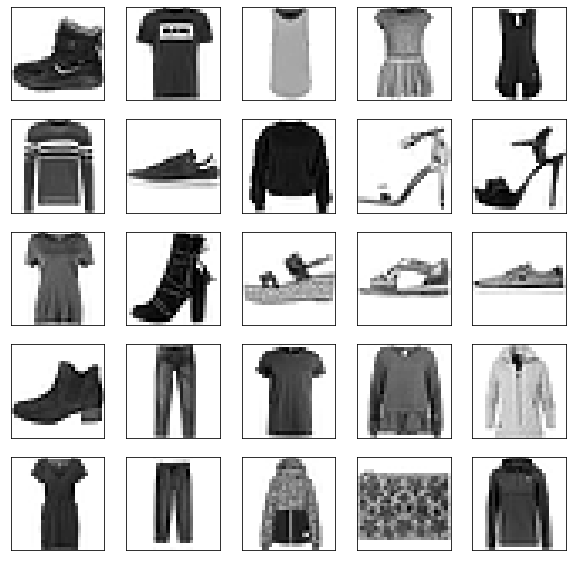

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
plt.show()

In [10]:
model  = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 5s 3ms/step - loss: 3.8185 - accuracy: 0.7012
Epoch 2/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6862 - accuracy: 0.7469
Epoch 3/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6187 - accuracy: 0.7671
Epoch 4/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5938 - accuracy: 0.7754
Epoch 5/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5672 - accuracy: 0.7885
Epoch 6/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5535 - accuracy: 0.7944
Epoch 7/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5443 - accuracy: 0.8008
Epoch 8/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5226 - accuracy: 0.8171
Epoch 9/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4980 - accuracy: 0.8298
Epoch 10/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.494

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3908 - accuracy: 0.8614

Test accuracy: 0.8614


In [55]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [56]:
predictions = probability_model.predict(test_images)

In [57]:
predictions[0]

array([2.2522454e-07, 3.8092911e-09, 1.9864087e-06, 5.1330089e-06,
       2.7864203e-06, 5.2787941e-02, 7.1352702e-06, 3.6155086e-02,
       1.7757689e-03, 9.0926391e-01], dtype=float32)

In [58]:
test_labels[0]

9

In [59]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

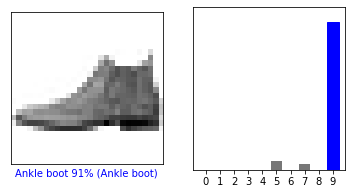

In [60]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

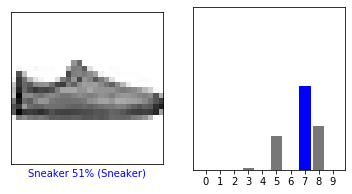

In [61]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()




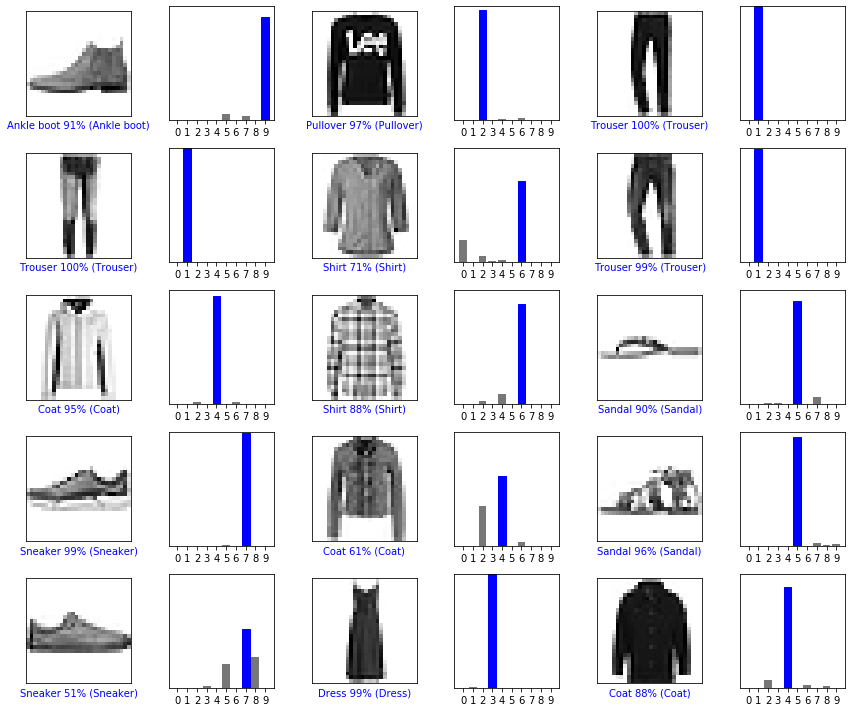

In [62]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [63]:
img = test_images[1]

print(img.shape)

(28, 28)
